Fitting the experimental data by the folowing formula:

$$y(P) = b + (m - b)\cdot \left( \frac{S+P+Kd - \sqrt{(S + P + Kd)^{2} - 4 SP}}{2 S} \right) $$

There are some conditions:
+ b = Amin > 0;
+ m = Amax;
+ Amin < Amax <= 0.4
+ Kd > 0

We need to search for:

+ Kd,
+ b,
+ m,
+ Chi^2
+ R^2

In [41]:
import os
import glob
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, leastsq
from scipy.stats import chisquare, linregress

In [20]:
def y_P(X, b, m, Kd):
    S, P = X
    return b + (m - b)*((S + P + Kd - (((S + P + Kd)**2) - 4*S*P)**0.5)/2*S)

In [72]:
files = sorted(glob.glob('data/*.csv'))
param_table = pd.DataFrame(columns=[
    'file',
    'b',
    'm',
    'Kd',
    'Chi^2',
    'R^2'
])

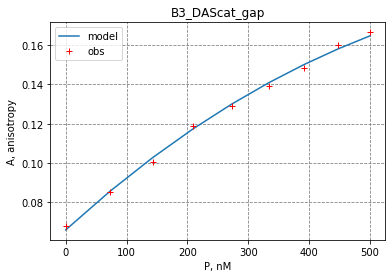

In [81]:
for idx, file in enumerate(files):
    table = pd.read_csv(file, sep='\t')
    
    name_smt = os.path.basename(file)[:-4]
    y = table['A, anisotropy']
    b = table['A, anisotropy'].min()
    m = table['A, anisotropy'].max()
    Kd = 1
    popt,pcov = curve_fit(y_P,(table.S, table.P),y,p0=[b, m, Kd])
    b_model, m_model, Kd_model = popt
    y_model = y_P((table.S, table.P),*popt)
    plt.clf()
    plt.title(name_smt)
    plt.ylabel('A, anisotropy')
    plt.xlabel('P, nM')
    plt.plot(table.P, y_model, label='model')
    plt.plot(table.P, table['A, anisotropy'], '+', color='red', label='obs')
    plt.grid(True, ls='--', color='gray')
    plt.legend()
    plt.savefig(f'images/{name_smt}.png', format='png', dpi=700)
    
    param_table.loc[idx] = [
        name_smt,
        round(b_model, 3),
        round(m_model, 3),
        round(Kd_model, 2),
        '{:.2e}'.format(chisquare(f_obs=y, f_exp=y_model)[0]),
        round(linregress(table.P, y_model)[2], 3)
    ]

In [83]:
param_table.to_csv('fit_params.csv', sep=',')